In [1]:
import h5py
import pandas as pd
import numpy as np
from akita_utils.format_io import h5_to_df
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stat_names = ["SCD", "diffSCD"]
df = h5_to_df("/home1/smaruj/akita_utils/bin/insert_virtual_compare_SCDs/data/10K/collected.h5", stat_names, drop_duplicates_key=None)

In [3]:
# copied from the flanking exp analysis

def average_over_targets(dataframe, stat, mouse=True, model=0):
    
    num_targets = 6
    if not mouse:
        num_targets = 5
    
    collist = [stat + f"_h{int(mouse)}_m{model}_t{i}" for i in range(num_targets)]
    
    dataframe[f"{stat}_average"] = dataframe[collist].mean(axis=1)
    
    return dataframe

In [4]:
for stat in stat_names:
    df = average_over_targets(df, stat)

# SCD vs. diffSCD correlation

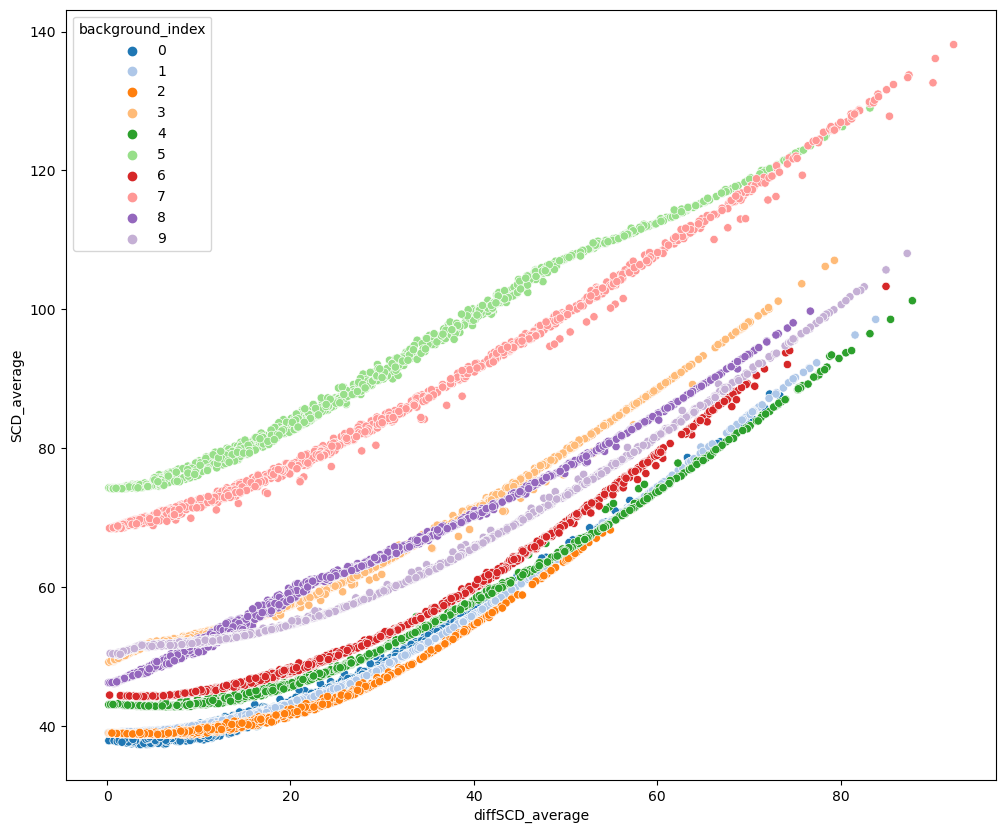

In [5]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x="diffSCD_average", y="SCD_average", hue="background_index", palette="tab20")
plt.show()

In [6]:
bg_indices = [i for i in range(10)]

In [7]:
minimum = [df[df["background_index"] == x].SCD_average.min() for x in range(10)]

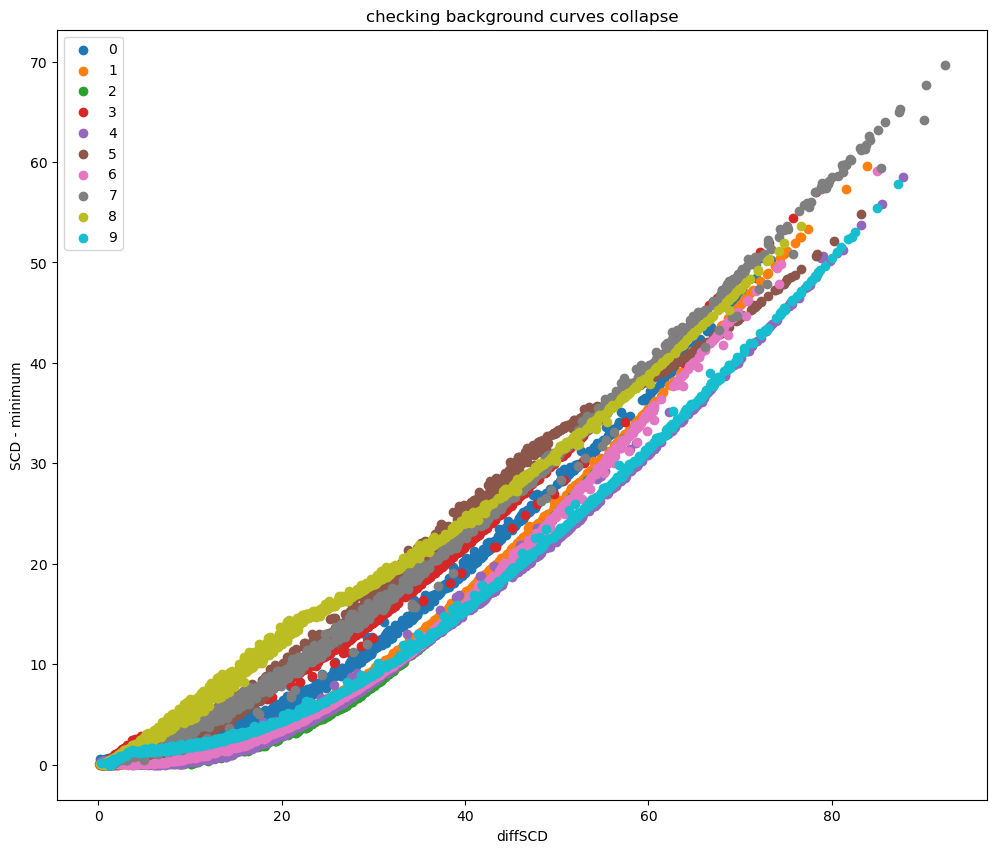

In [8]:
plt.figure(figsize=(12,10))

for bg_index in bg_indices:
    plt.scatter(df[df["background_index"] == bg_index].diffSCD_average, df[df["background_index"] == bg_index].SCD_average - minimum[bg_index], label=bg_index)

plt.title("checking background curves collapse")
plt.xlabel("diffSCD")
plt.ylabel("SCD - minimum")
    
plt.legend()
plt.show()

## after split between backgrounds

Text(0.5, 0.98, 'Correlations between SCD and diffSCD')

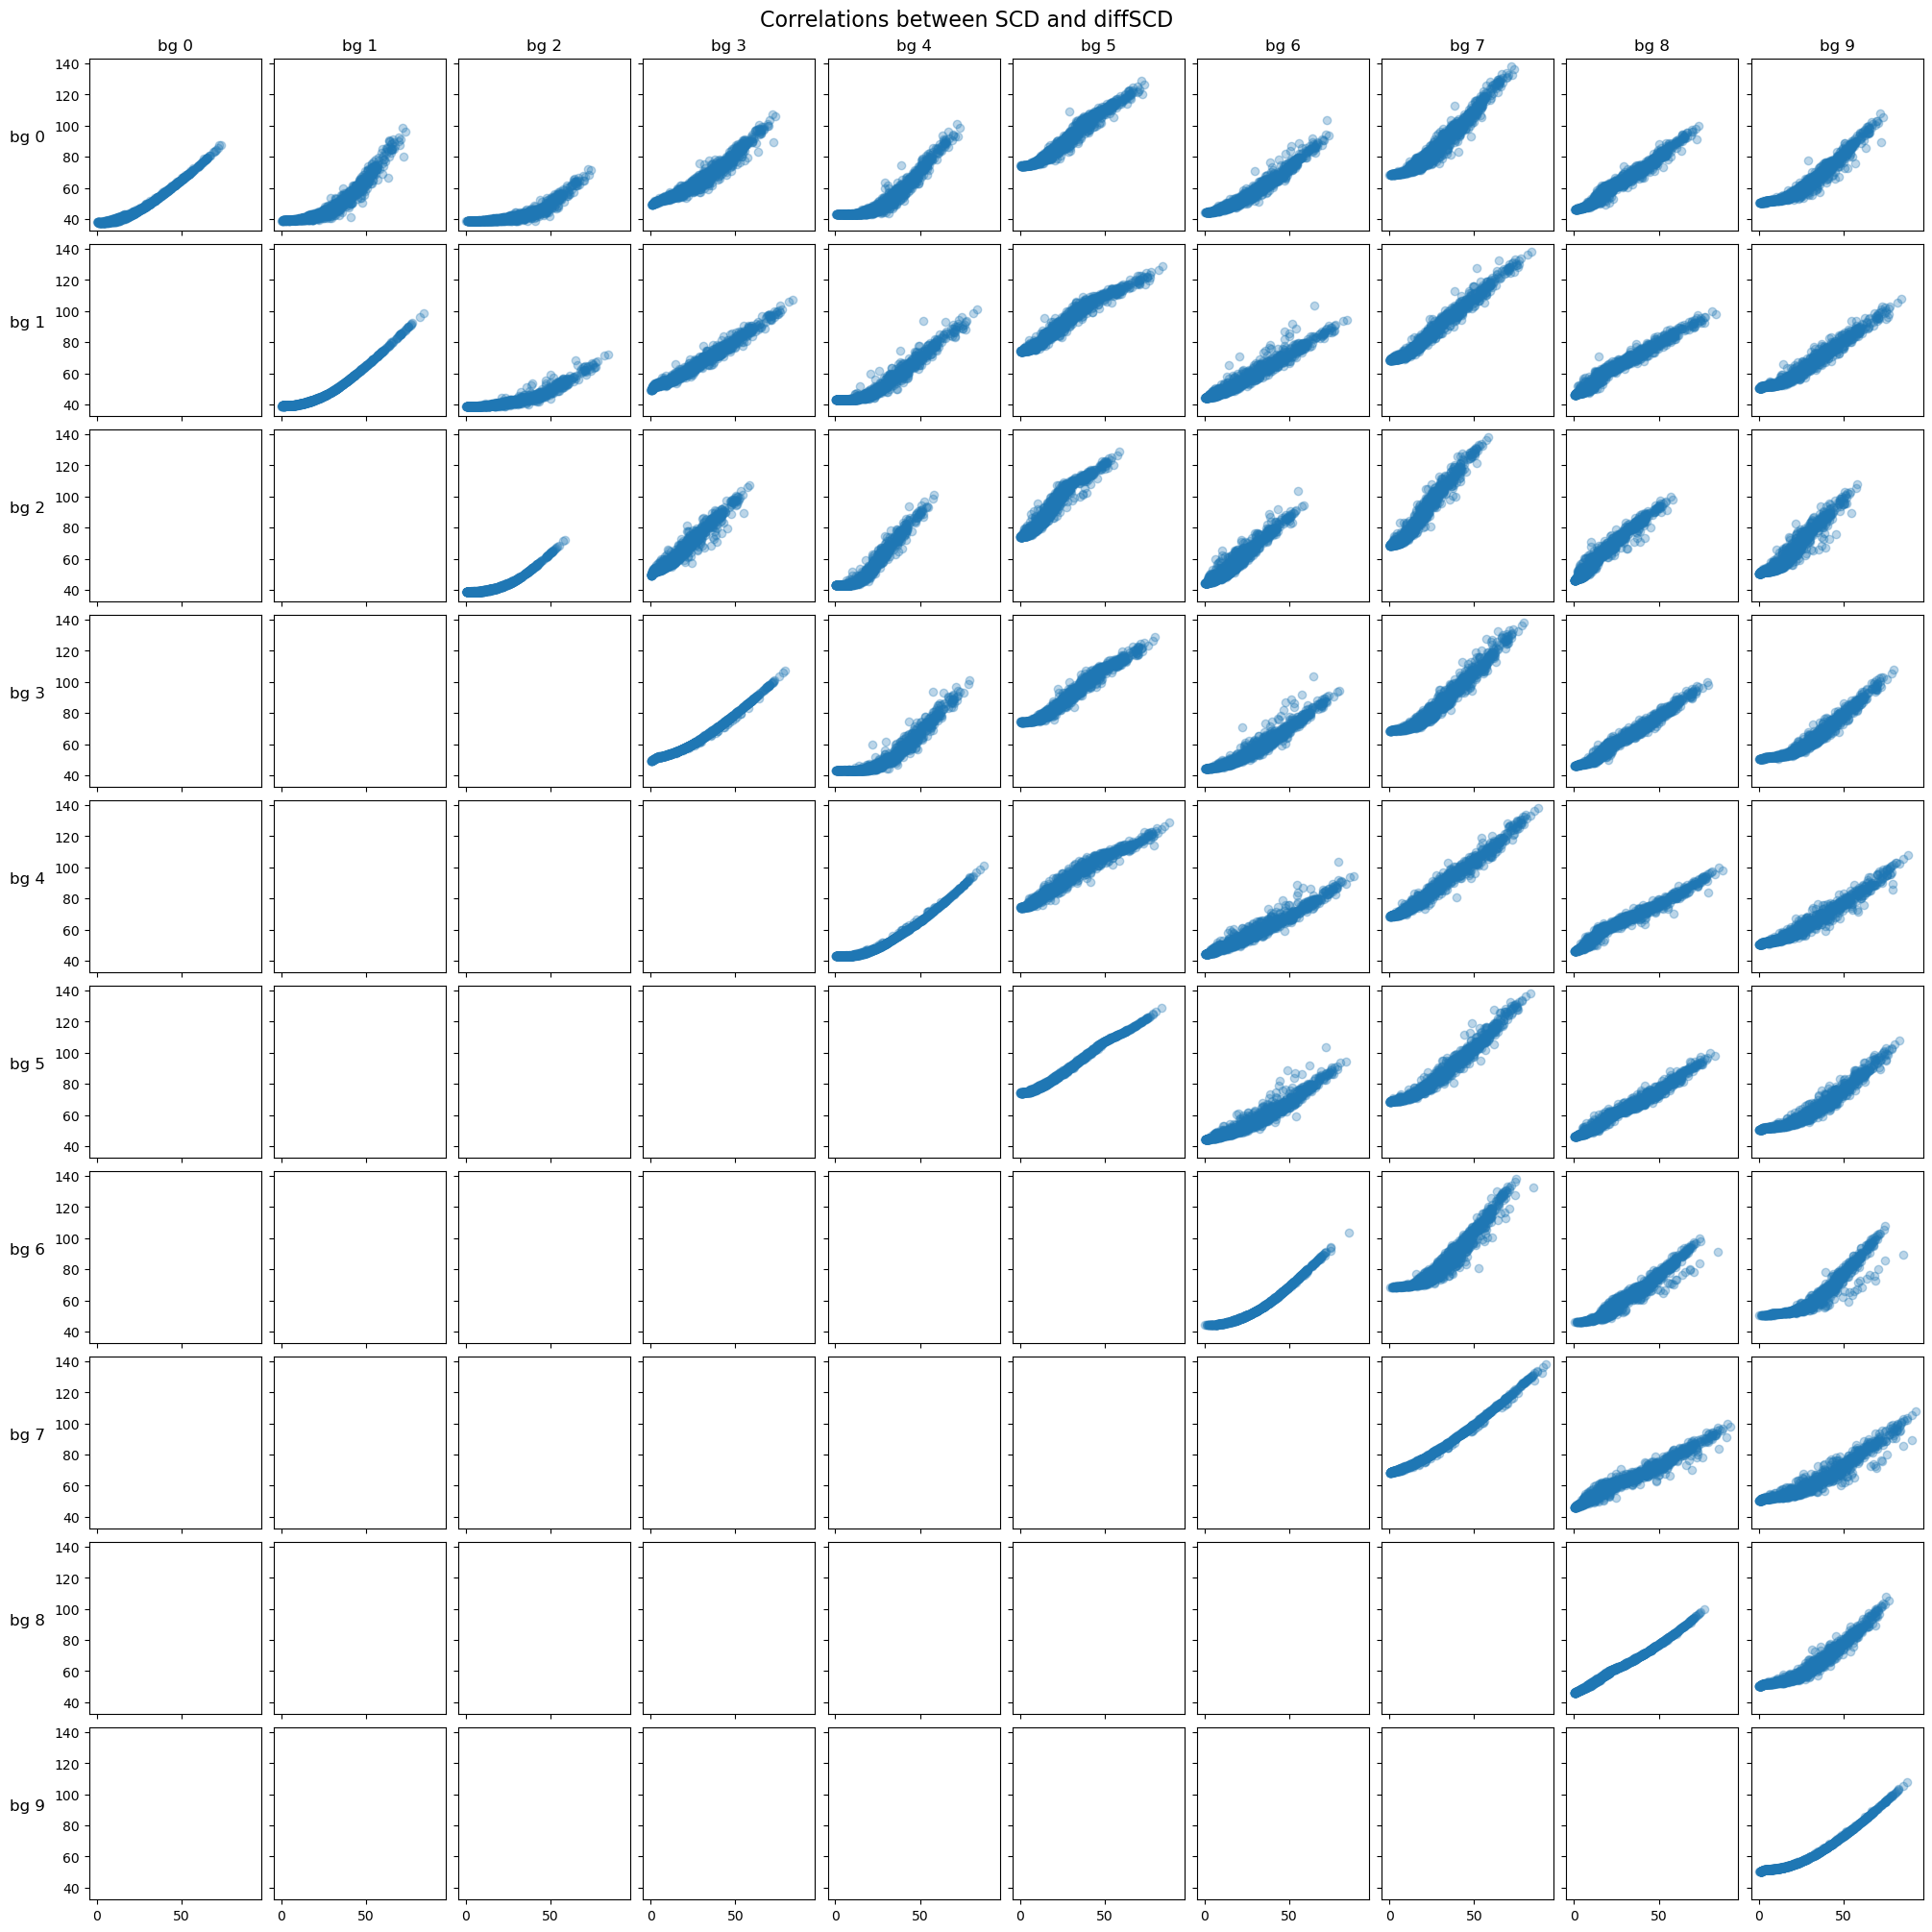

In [9]:
fig, axs = plt.subplots(10, 10, figsize=(20, 20), sharex=True, sharey=True, layout="constrained")

for bg_index_x in bg_indices:
    for bg_index_y in bg_indices:
        if (bg_index_y >= bg_index_x):
            
            diffSCD = np.array(df[df["background_index"] == bg_index_x].diffSCD_average)
            SCD = np.array(df[df["background_index"] == bg_index_y].SCD_average)
            
            axs[bg_index_x, bg_index_y].scatter(x=diffSCD, y=SCD, alpha=0.3)

names = [f"bg {i}" for i in bg_indices]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle("Correlations between SCD and diffSCD", fontsize=16)
    

In [10]:
corr_summary = np.zeros((10,10))

for bg_index_x in bg_indices:
    for bg_index_y in bg_indices: 
        diffSCD = np.array(df[df["background_index"] == bg_index_x].diffSCD_average)
        SCD = np.array(df[df["background_index"] == bg_index_y].SCD_average)
        corr_summary[bg_index_x, bg_index_y] = stats.pearsonr(diffSCD, SCD).statistic

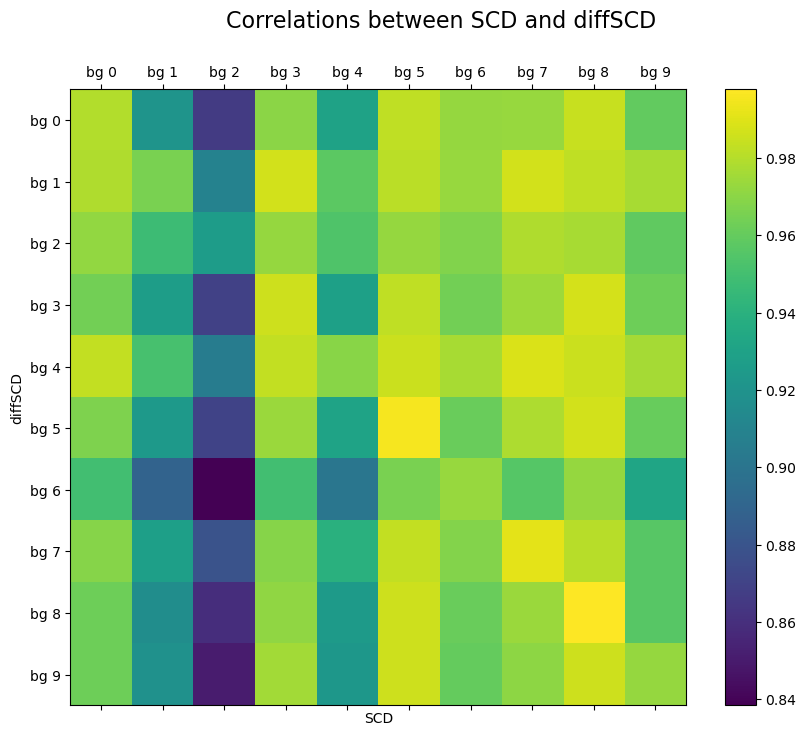

In [11]:
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)
cax = ax.matshow(corr_summary, interpolation='nearest')
fig.colorbar(cax)

names = [f"bg {i}" for i in bg_indices]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

ax.set_ylabel("diffSCD")
ax.set_xlabel("SCD")

fig.suptitle("Correlations between SCD and diffSCD", fontsize=16)

fig.show()

## sum of over-backgrounds standard deviations (calculated for each site)

In [12]:
SCD_by_starts = pd.DataFrame(df[df["background_index"] == 0].start, columns=['start'])

for bg_index in bg_indices:
    SCD_by_starts[f"SCD_average_{bg_index}"] = np.array(df[df["background_index"] == bg_index].SCD_average)

In [13]:
diffSCD_by_starts = pd.DataFrame(df[df["background_index"] == 0].start, columns=['start'])

for bg_index in bg_indices:
    diffSCD_by_starts[f"SCD_average_{bg_index}"] = np.array(df[df["background_index"] == bg_index].diffSCD_average)

In [14]:
SCD_by_starts["inter_bg_sd"] = SCD_by_starts.loc[:, SCD_by_starts.columns!="start"].std(axis=1)
diffSCD_by_starts["inter_bg_sd"] = diffSCD_by_starts.loc[:, diffSCD_by_starts.columns!="start"].std(axis=1)

In [15]:
SCD_by_starts["inter_bg_sd"].sum()

16010.0

In [16]:
diffSCD_by_starts["inter_bg_sd"].sum()

5250.0

In [17]:
# Inter-background sd is strongly higher for SCD than for diffSCD

# SCD vs SCD Correlation

Text(0.5, 0.98, 'Correlations between SCD and SCD')

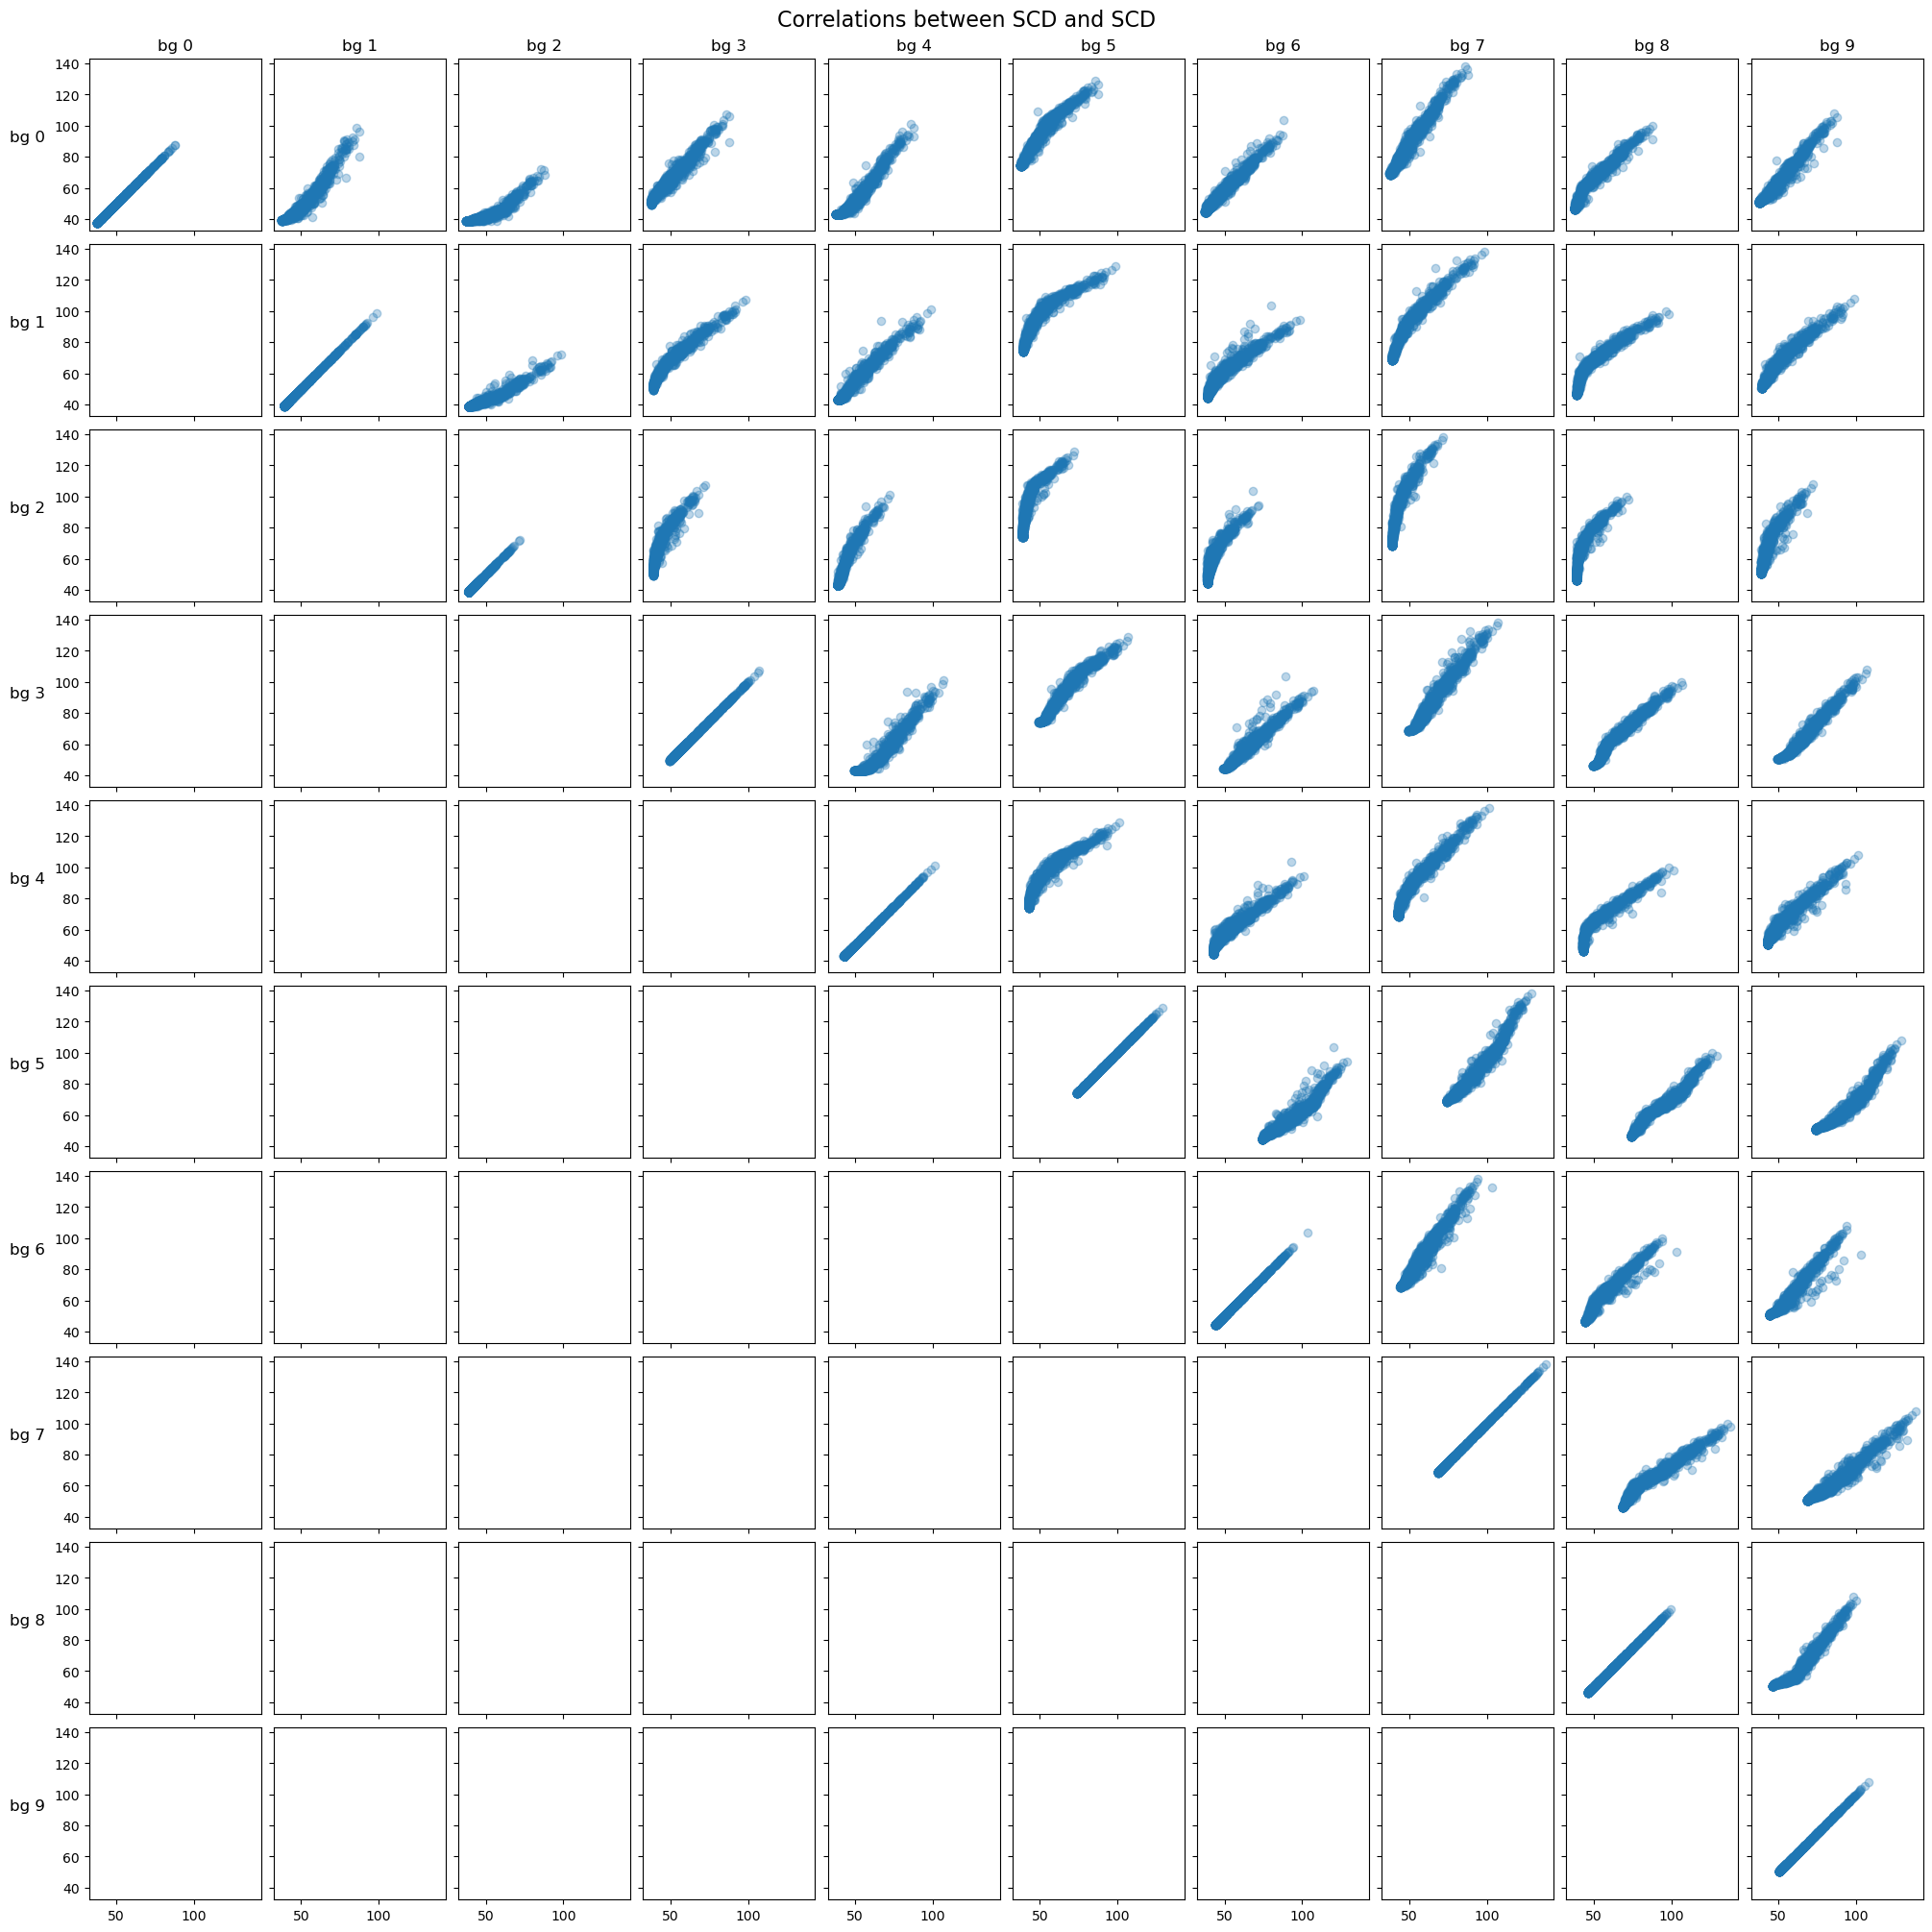

In [18]:
fig, axs = plt.subplots(10, 10, figsize=(20, 20), sharex=True, sharey=True, layout="constrained")

for bg_index_x in bg_indices:
    for bg_index_y in bg_indices:
        if (bg_index_y >= bg_index_x):
            
            xSCD = np.array(df[df["background_index"] == bg_index_x].SCD_average)
            ySCD = np.array(df[df["background_index"] == bg_index_y].SCD_average)
            
            axs[bg_index_x, bg_index_y].scatter(x=xSCD, y=ySCD, alpha=0.3)

names = [f"bg {i}" for i in bg_indices]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle("Correlations between SCD and SCD", fontsize=16)
    

In [19]:
# correlations

SCD_corr_summary = np.zeros((10,10))

for bg_index_x in bg_indices:
    for bg_index_y in bg_indices: 
        xSCD = np.array(df[df["background_index"] == bg_index_x].SCD_average)
        ySCD = np.array(df[df["background_index"] == bg_index_y].SCD_average)
        SCD_corr_summary[bg_index_x, bg_index_y] = stats.pearsonr(xSCD, ySCD).statistic

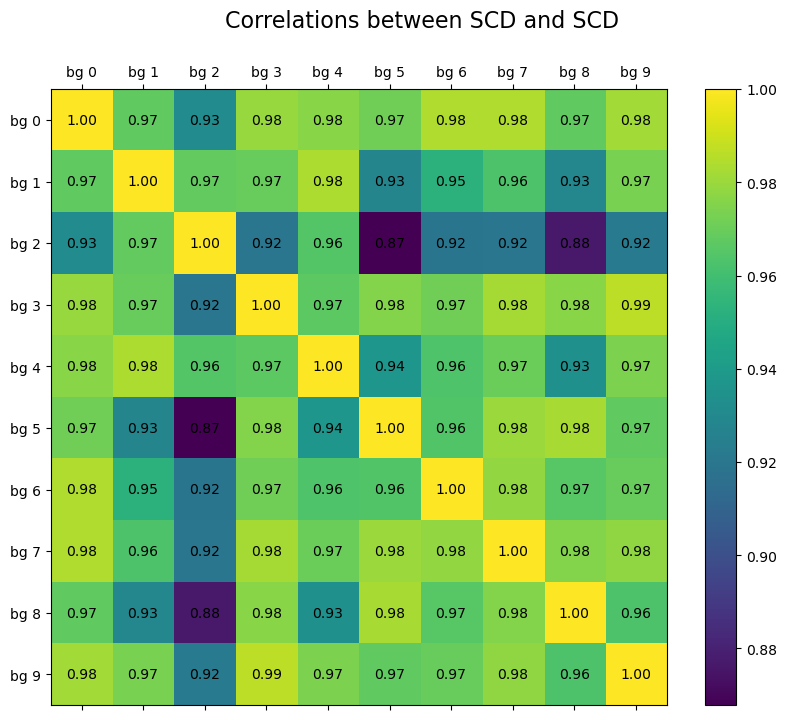

In [20]:
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)
cax = ax.matshow(SCD_corr_summary, interpolation='nearest')
fig.colorbar(cax)

names = [f"bg {i}" for i in bg_indices]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

for (x, y), value in np.ndenumerate(SCD_corr_summary):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")

fig.suptitle("Correlations between SCD and SCD", fontsize=16)

fig.show()

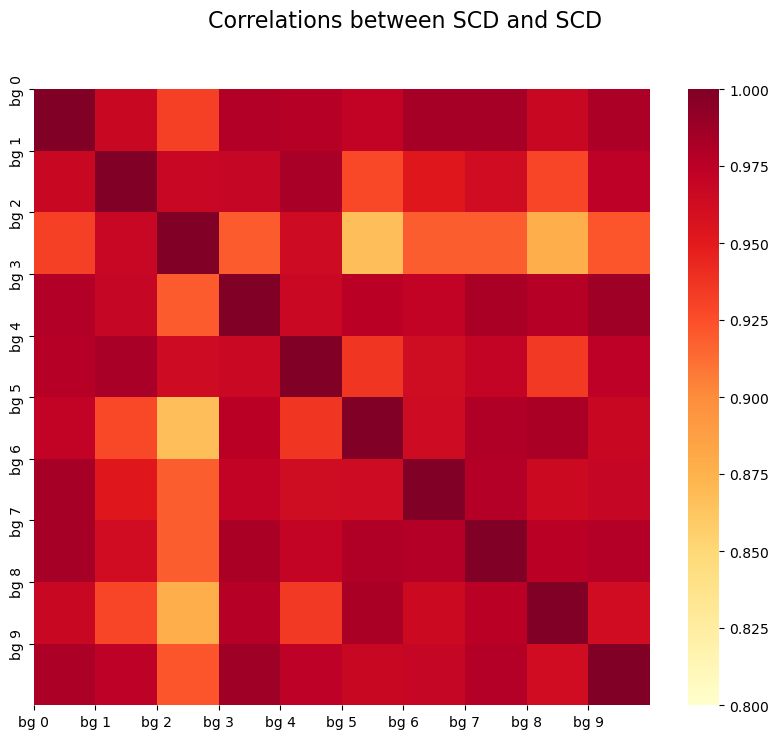

In [21]:
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)

sns.heatmap(SCD_corr_summary,
            ax=ax,
            vmin=0.80,
            vmax=1.0,
            cbar=True,
            cmap="YlOrRd",
            square=True
        )

names = [f"bg {i}" for i in bg_indices]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

fig.suptitle("Correlations between SCD and SCD", fontsize=16)

fig.show()


# diffSCD vs diffSCD Correlation

Text(0.5, 0.98, 'Correlations between diffSCD and diffSCD')

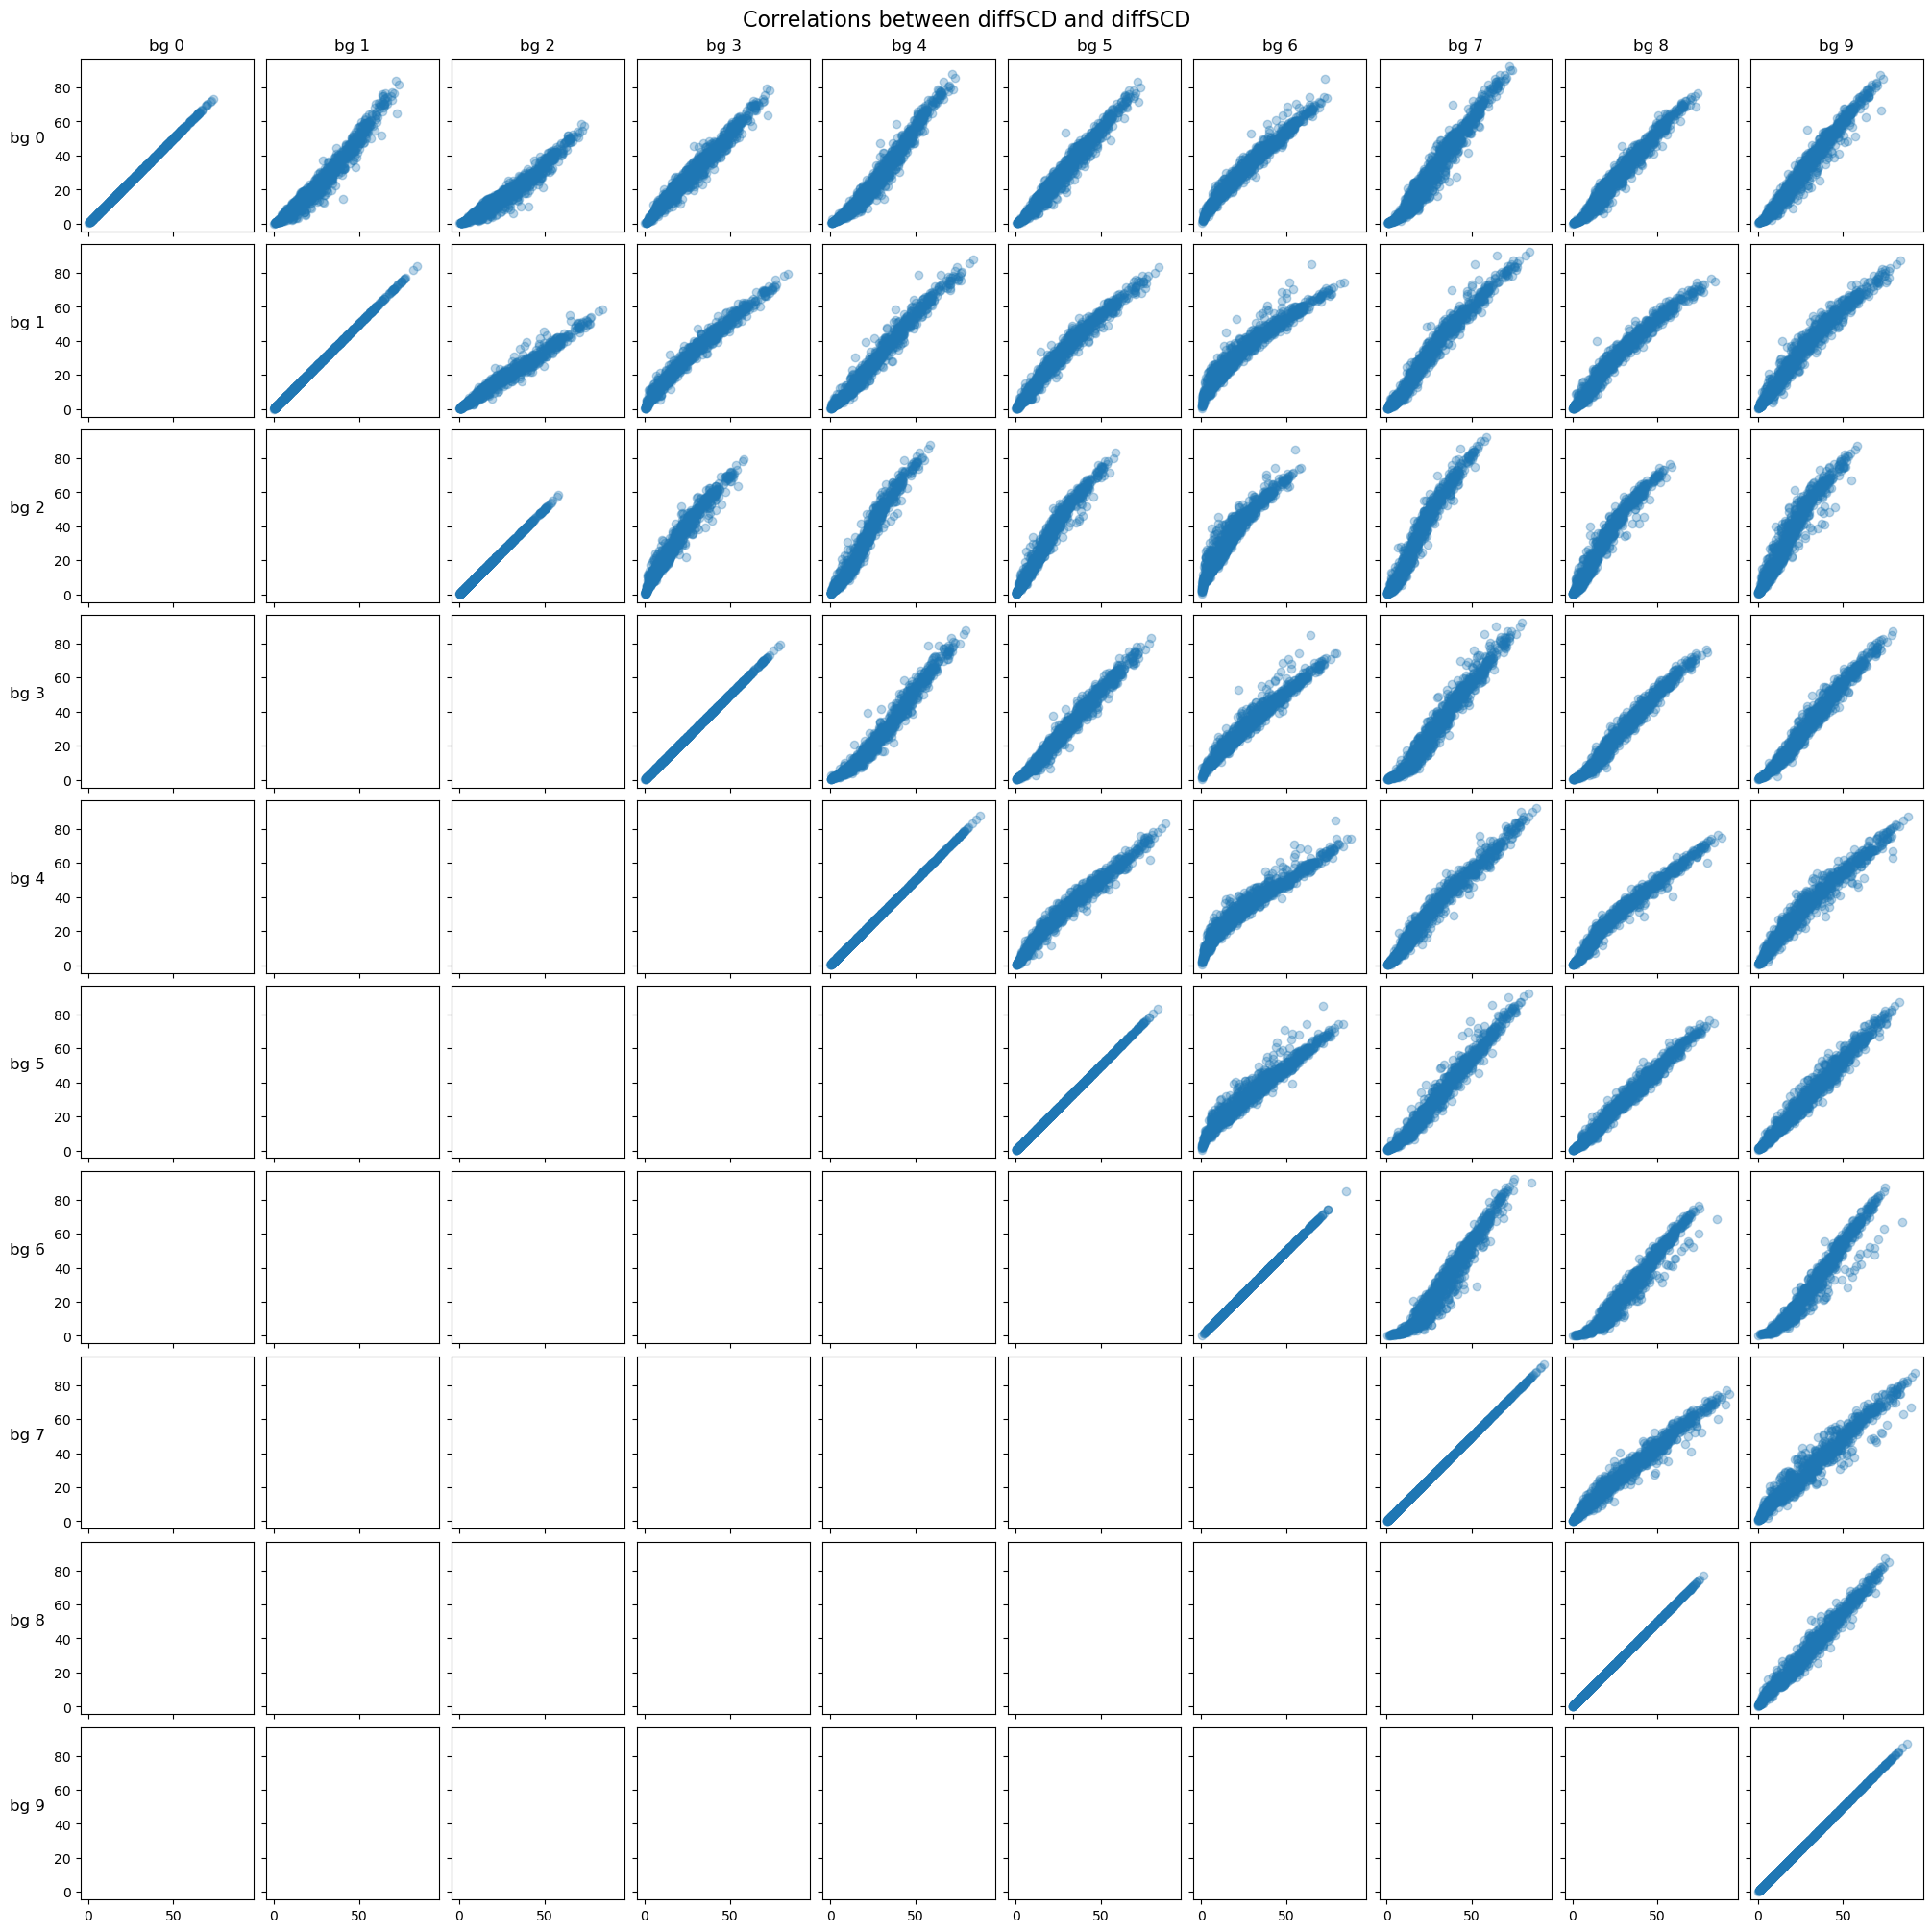

In [22]:
fig, axs = plt.subplots(10, 10, figsize=(20, 20), sharex=True, sharey=True, layout="constrained")

for bg_index_x in bg_indices:
    for bg_index_y in bg_indices:
        if (bg_index_y >= bg_index_x):
            
            xdiffSCD = np.array(df[df["background_index"] == bg_index_x].diffSCD_average)
            ydiffSCD = np.array(df[df["background_index"] == bg_index_y].diffSCD_average)
            
            axs[bg_index_x, bg_index_y].scatter(x=xdiffSCD, y=ydiffSCD, alpha=0.3)

names = [f"bg {i}" for i in bg_indices]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle("Correlations between diffSCD and diffSCD", fontsize=16)
    

In [23]:
# correlations

diffSCD_corr_summary = np.zeros((10,10))

for bg_index_x in bg_indices:
    for bg_index_y in bg_indices: 
        xdiffSCD = np.array(df[df["background_index"] == bg_index_x].diffSCD_average)
        ydiffSCD = np.array(df[df["background_index"] == bg_index_y].diffSCD_average)
        diffSCD_corr_summary[bg_index_x, bg_index_y] = stats.pearsonr(xdiffSCD, ydiffSCD).statistic

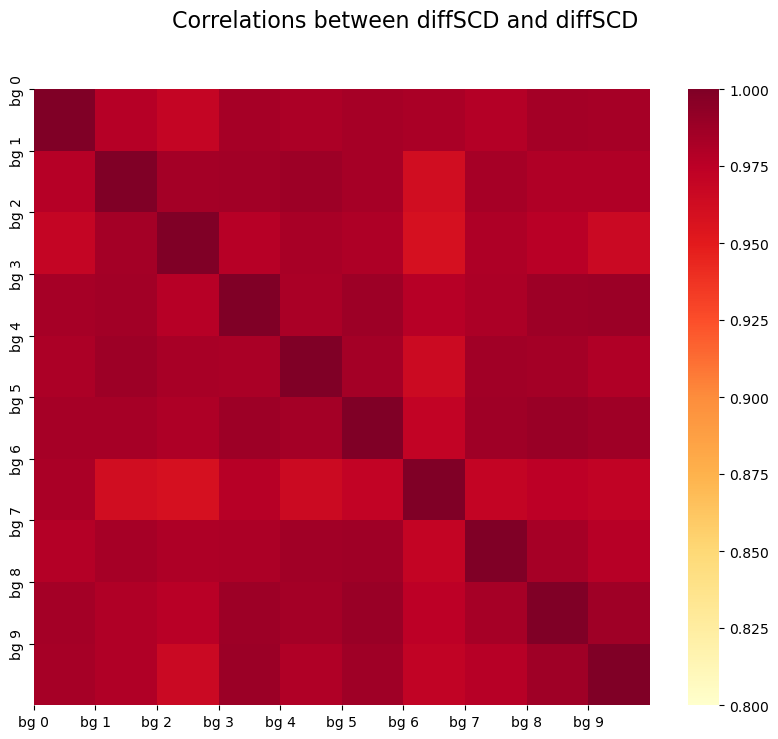

In [24]:
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)

sns.heatmap(diffSCD_corr_summary,
            ax=ax,
            vmin=0.80,
            vmax=1.0,
            cbar=True,
            cmap="YlOrRd",
            square=True
        )

names = [f"bg {i}" for i in bg_indices]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

fig.suptitle("Correlations between diffSCD and diffSCD", fontsize=16)

fig.show()


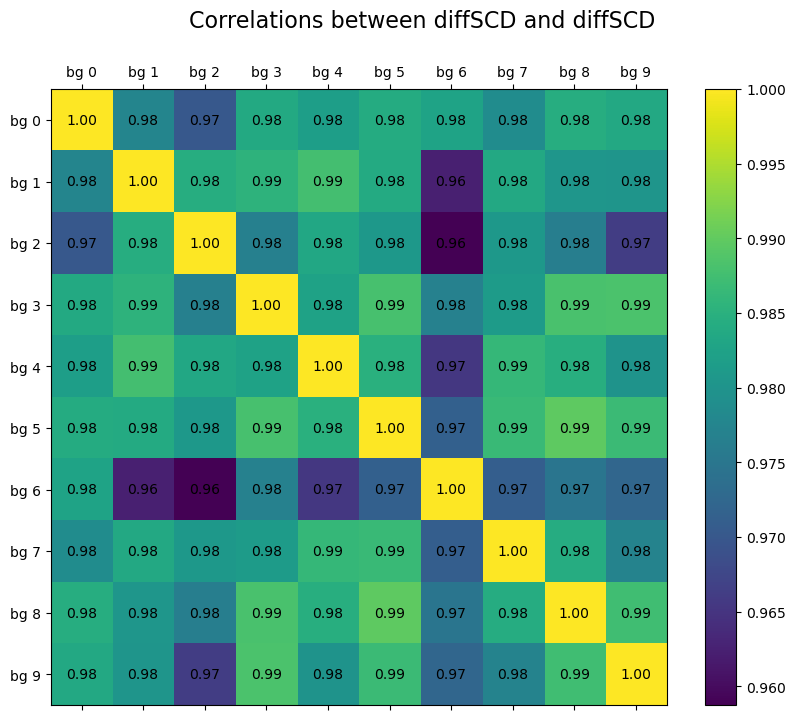

In [25]:
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)
cax = ax.matshow(diffSCD_corr_summary)
fig.colorbar(cax)

names = [f"bg {i}" for i in bg_indices]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

for (x, y), value in np.ndenumerate(diffSCD_corr_summary):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")

fig.suptitle("Correlations between diffSCD and diffSCD", fontsize=16)

fig.show()

# Conclusions:

1. We see a not strongly linear (although highly correlated) relationship between (old) SCD and diffSCD (with background subtraction).   
2. Inter-background standard deviation is lower for diffSCD than for SCD without background subtraction.   
3. Correlations of diffSCD between motifs are higher than analogous calculated for SCD. Scatterplots show more linear relationship between diffSCD calculated for pairs of backgrounds.   